In [1]:
# Full-code and Notes at GitHub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from sklearn.feature_selection import (
    mutual_info_classif, mutual_info_regression
)
from scipy.stats import pearsonr, spearmanr, kendalltau
import seaborn as sns

np.random.seed(47)
plt.style.use('dark_background')

# --- Cat-Cat: Zero Mutual Information ---
categories_X = [1, 2, 3]
categories_Y = [4, 5, 6]
p_X = [0.3, 0.2, 0.5]
p_Y = [0.45, 0.25, 0.3]
X_cat = np.random.choice(categories_X, size=100, p=p_X)
Y_cat = np.random.choice(categories_Y, size=100, p=p_Y)
contingency_matrix = pd.crosstab(X_cat, Y_cat)
contingency_matrix

col_0,4,5,6
row_0,,,
1,15,5,6
2,7,7,6
3,21,11,22


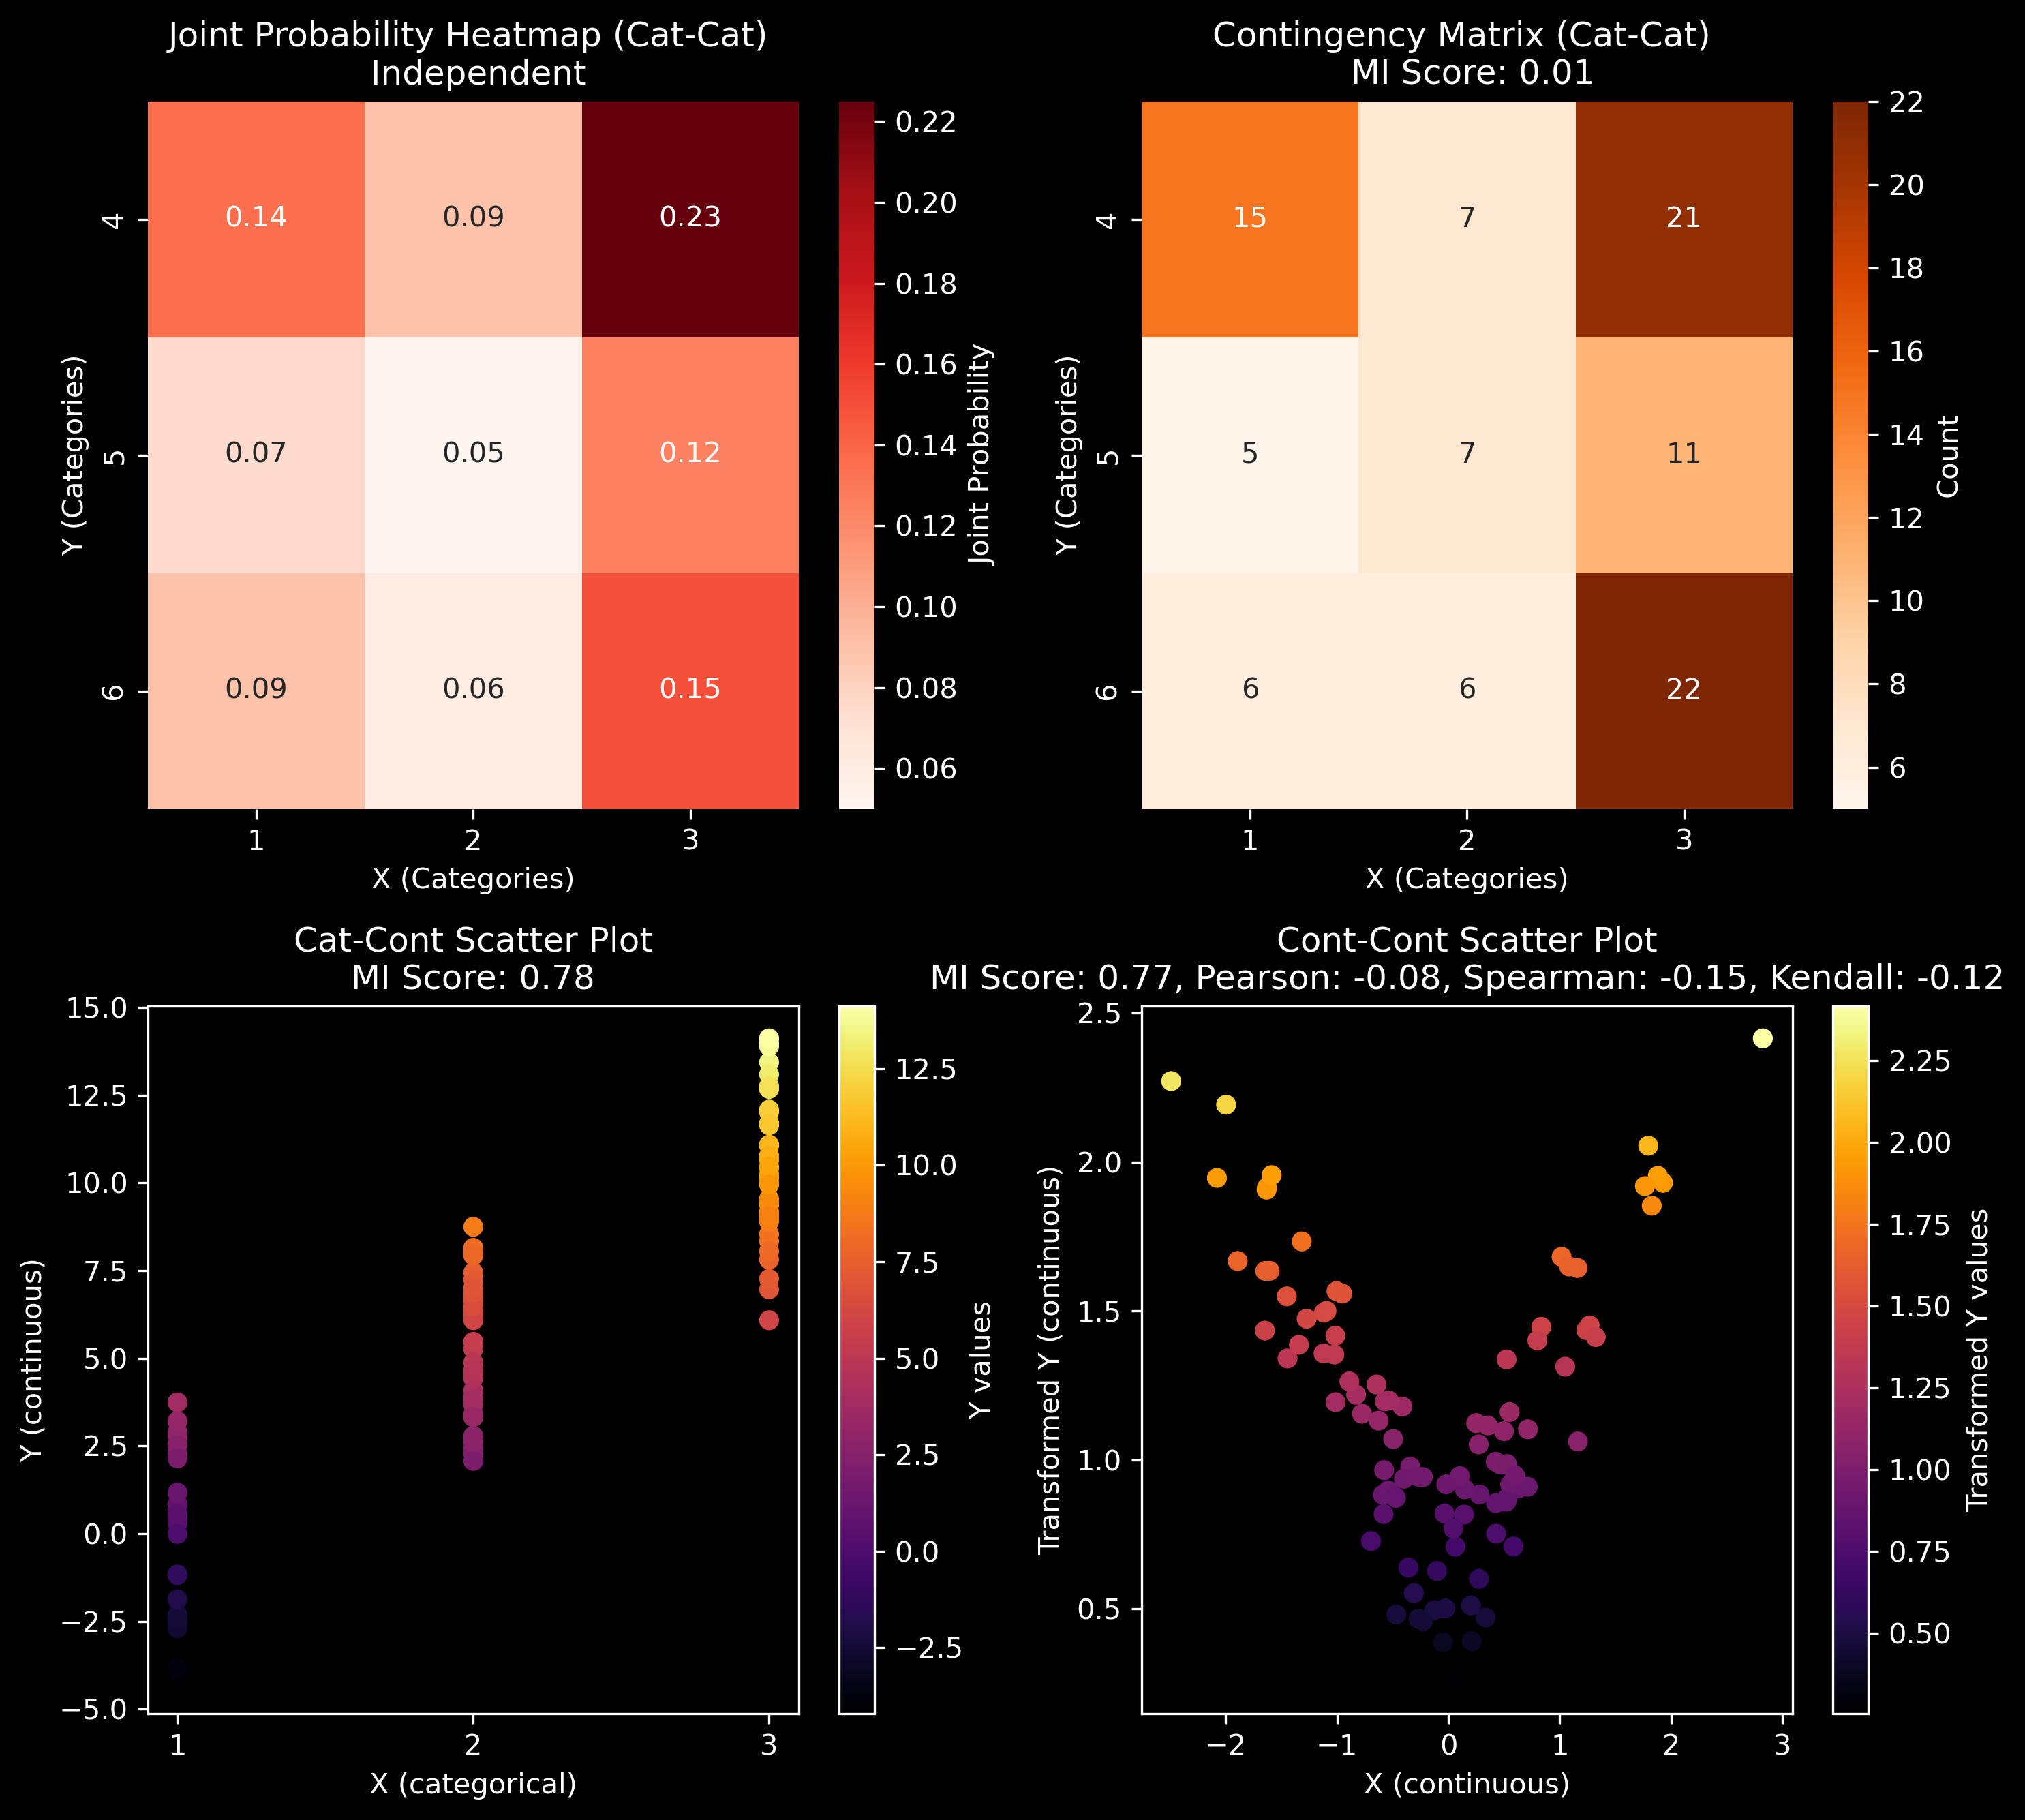

In [2]:
fig, axs = plt.subplots(2, 2, figsize=(10, 9), dpi=300)

# Plot 1: Joint Probability Density (Cat-Cat)
sns.heatmap(
    np.outer(np.array(p_X), np.array(p_Y)).T,
    annot=True, cmap='Reds', fmt='.2f',
    cbar_kws={'label': 'Joint Probability'},
    ax=axs[0, 0]
)
axs[0, 0].set_title(
    "Joint Probability Heatmap (Cat-Cat) \n Independent"
)
axs[0, 0].set_xlabel("X (Categories)")
axs[0, 0].set_ylabel("Y (Categories)")
axs[0, 0].set_xticklabels([1, 2, 3])
axs[0, 0].set_yticklabels([4, 5, 6])

# MI Score for Cat-Cat
mi_score_cat_cat = mutual_info_classif(
    np.array(Y_cat).reshape(-1, 1), X_cat
)[0]

# Plot 2: Contingency Matrix of the Observed Data (Cat-Cat)
sns.heatmap(
    contingency_matrix.T, annot=True, cmap='Oranges',
    fmt='d', cbar_kws={'label': 'Count'},
    ax=axs[0, 1]
)
axs[0, 1].set_title(
    f"Contingency Matrix (Cat-Cat) \n MI Score: {mi_score_cat_cat:.2f}"
)
axs[0, 1].set_xlabel("X (Categories)")
axs[0, 1].set_ylabel("Y (Categories)")

# --- Cat-Cont: Non-zero Mutual Information ---
X = np.random.choice(categories_X, size=100,
                     p=[0.3, 0.4, 0.3])
means = {1: 0, 2: 5, 3: 10}
std_dev = 2
Y = np.array([np.random.normal(loc=means[x], scale=std_dev) for x in X])

# MI Score for Cat-Cont
mi_score_cat_cont = mutual_info_classif(Y.reshape(-1, 1), X)[0]

# Plot 3: Cat-Cont Scatter Plot
scatter_cat_cont = axs[1, 0].scatter(X, Y, c=Y, cmap='inferno')
axs[1, 0].set_xlabel("X (categorical)")
axs[1, 0].set_ylabel("Y (continuous)")
axs[1, 0].set_title(
    f"Cat-Cont Scatter Plot\nMI Score: {mi_score_cat_cont:.2f}"
)
axs[1, 0].set_xticks([1, 2, 3])
cbar_cat_cont = plt.colorbar(scatter_cat_cont, ax=axs[1, 0])
cbar_cat_cont.set_label("Y values", labelpad=2)

# --- Cont-Cont: Non-zero Information with sqrt Transformation ---
X_cont = np.random.normal(loc=0, scale=1, size=100)
Y_cont = 2 * X_cont + np.random.normal(loc=0, scale=0.5, size=100)
Y_cont_transformed = np.sqrt(np.abs(Y_cont))

# MI Score for Cont-Cont
mi_score_cont_cont = mutual_info_regression(
    X_cont.reshape(-1, 1), Y_cont_transformed
)[0]

# Calculate Pearson, Spearman, Kendall Tau-b correlations
pearson_corr, _ = pearsonr(X_cont, Y_cont_transformed)
spearman_corr, _ = spearmanr(X_cont, Y_cont_transformed)
kendall_corr, _ = kendalltau(X_cont, Y_cont_transformed)

# Plot 4: Cont-Cont Scatter Plot
scatter_cont_cont = axs[1, 1].scatter(X_cont, Y_cont_transformed,
                                      c=Y_cont_transformed, cmap='inferno')
axs[1, 1].set_xlabel("X (continuous)")
axs[1, 1].set_ylabel("Transformed Y (continuous)")
axs[1, 1].set_title(
    f"Cont-Cont Scatter Plot\nMI Score: {mi_score_cont_cont:.2f}, "
    f"Pearson: {pearson_corr:.2f}, Spearman: {spearman_corr:.2f}, "
    f"Kendall: {kendall_corr:.2f}"
)
cbar_cont_cont = plt.colorbar(scatter_cont_cont, ax=axs[1, 1])
cbar_cont_cont.set_label("Transformed Y values", labelpad=5)

plt.tight_layout()
plt.show()

# Mutual Information (MI)

- **Definition**: Measures the dependence between two random variables, quantifying how much knowing one reduces uncertainty about the other.
- **Formula**:  
$$
I(X; Y) = \sum_{x \in X} \sum_{y \in Y} p(x, y) \log \left( \frac{p(x, y)}{p(x) p(y)} \right)
$$
- **Properties**:  
  - $I(X; Y) \geq 0$  
  - Symmetric: $I(X; Y) = I(Y; X)$  
  - Additive: $I(X; Y, Z) = I(X; Y) + I(X; Z | Y)$
- **Interpretation**:  
  - $I(X; Y) = 0$: $X$ and $Y$ are independent.  
  - Higher $I(X; Y)$ means more shared information.
- **Applications**: Feature selection, image registration, and signal processing.
